In [1]:
import pandas as pd

# Load the dataset
file_path = 'StudentPerformanceFactors.csv'
data = pd.read_csv(file_path)

# Display the first few rows and info
print(data.head())
print(data.info())


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources   
0             23          84                  Low                High  \
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level   
0                         No            7               73              Low  \
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality   
0             Ye

In [2]:
# Check for missing values
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

# Fill missing values with mode (most frequent value)
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)


Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


In [3]:
# List of categorical columns
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
                       'Distance_from_Home', 'Gender']

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows after encoding
print(data_encoded.head())


   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions   
0             23          84            7               73                  0  \
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  Exam_Score  Parental_Involvement_Low   
0                  3          67                      True  \
1                  4          61                      True   
2                  4          74                     False   
3                  4          71                      True   
4                  4          70                     False   

   Parental_Involvement_Medium  Access_to_Resources_Low  ...   
0                        False                    False  ...  \
1           

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores   
count    6607.000000  6607.000000   6607.00000      6607.000000  \
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

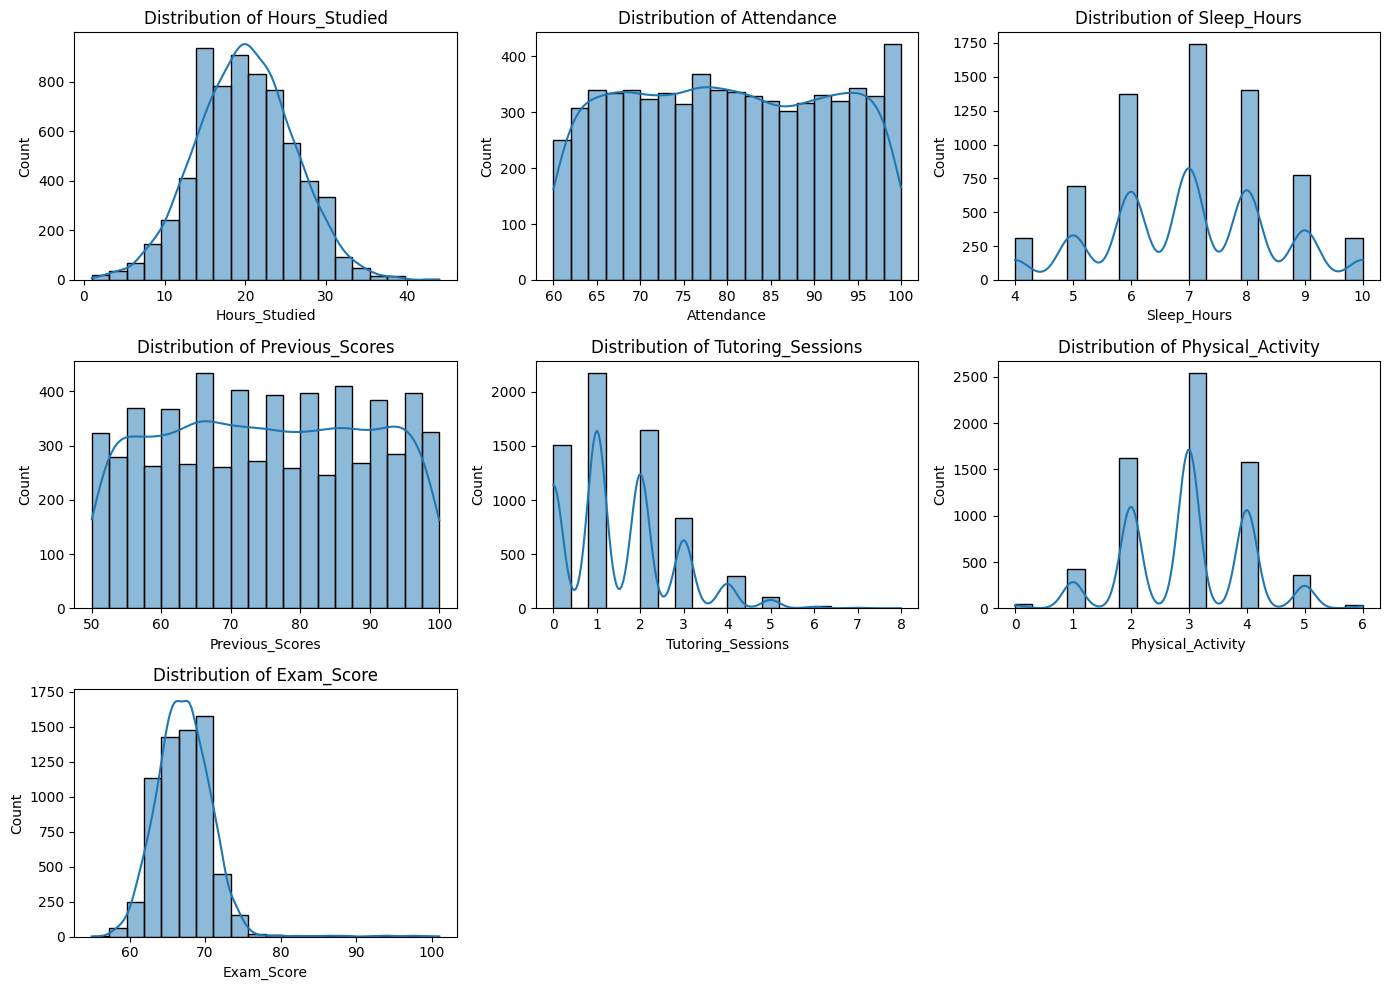

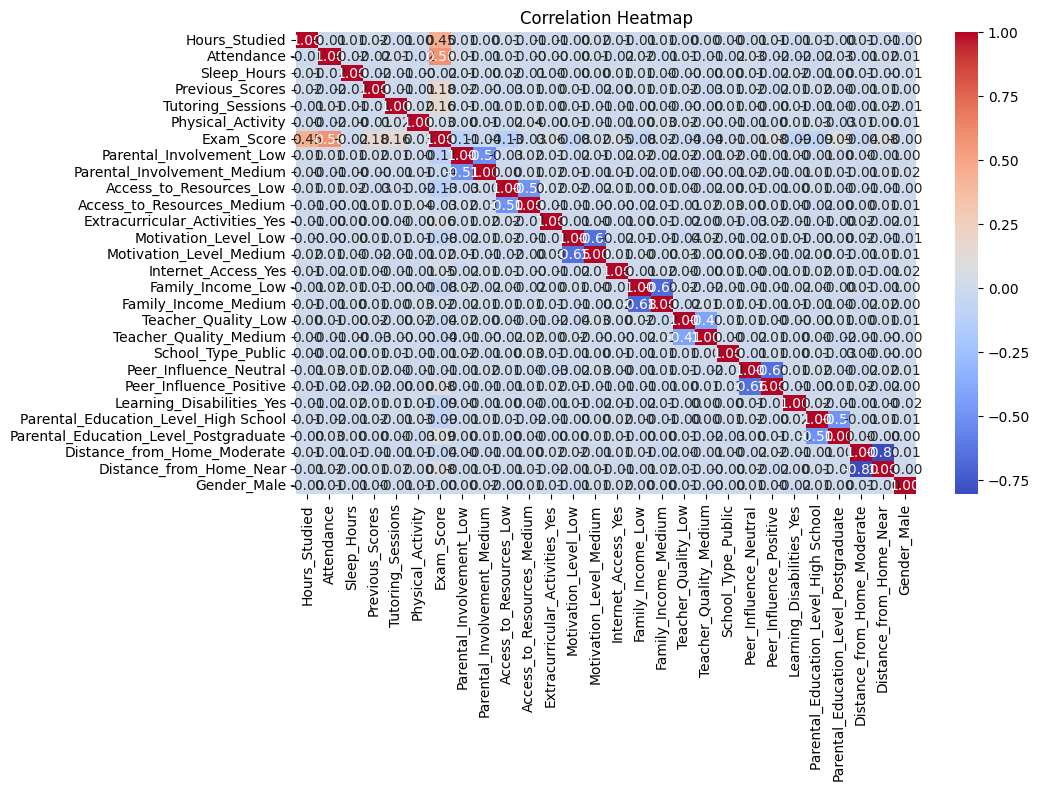

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics for numerical columns
print(data_encoded.describe())

# Plot histograms for key numerical columns
numerical_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                     'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_encoded[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Heatmap to show correlations between numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


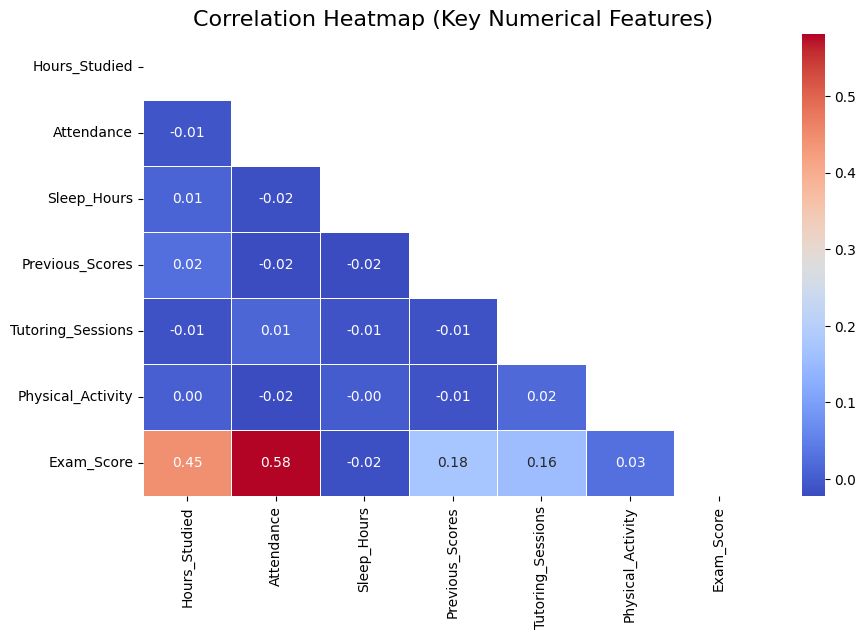

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for the correlation matrix (excluding one-hot encoded columns)
correlation_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

# Calculate correlation matrix
correlation_matrix = data_encoded[correlation_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Title and display
plt.title('Correlation Heatmap (Key Numerical Features)', fontsize=16)
plt.show()
